In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

In [43]:
data_2014 = pd.read_csv('data/data_2014.csv', encoding='unicode_escape')
data_2018 = pd.read_csv('data/data_2018.csv', encoding='unicode_escape')
data_2022 = pd.read_csv('data/data_2022.csv', encoding='unicode_escape')

In [44]:
deps = np.array(data_2014['Dpto'])

In [60]:
y = np.ones(33)
for i in range(33):
    if data_2018['Partido'][i] == data_2014['Partido'][i]:
        y[i] = 1
    else:
        y[i] = 0

In [46]:
X = np.array([data_2018['Porcentaje']-data_2014['Porcentaje']]).T

In [47]:
classifier = LogisticRegression().fit(X, y)

In [48]:
classifier.classes_

array([0., 1.])

In [49]:
classifier.coef_,classifier.intercept_

(array([[0.02971916]]), array([-0.03742596]))

In [50]:
Y_predict = classifier.predict(X)
Y_predict

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

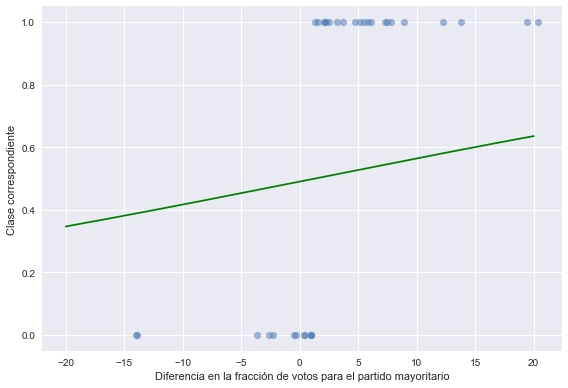

In [73]:
t = np.linspace(-20,20,1000)
p = 1/(1+np.exp(-classifier.coef_*t-classifier.intercept_))

plt.figure()
plt.style.use('seaborn')
plt.scatter(X, Y_predict, edgecolor = 'skyblue', s=50, alpha=0.5)
plt.plot(t, p.T, 'g')
plt.xlabel('Diferencia en la fracción de votos para el partido mayoritario')
plt.ylabel('Clase correspondiente')
plt.tight_layout()
plt.savefig('results/model.png')

In [52]:
test = np.ones(33)
val = data_2022['Partido'] == data_2018['Partido']
for i in range(33):
    if val[i]:
        test[i] = 1
    else:
        test[i] = 0
test

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.])

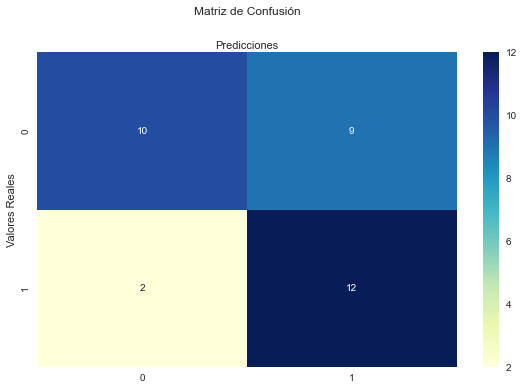

In [76]:
cnf_matrix = sklearn.metrics.confusion_matrix(test, Y_predict)

classes=[0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.tight_layout()
plt.savefig('results/confusion_matrix.png')

In [58]:
print("Exactitud:", sklearn.metrics.accuracy_score(test, Y_predict))
print("Precisión:", sklearn.metrics.precision_score(test, Y_predict))
print("Cobertura (Recall):", sklearn.metrics.recall_score(test, Y_predict))

Exactitud: 0.6666666666666666
Precisión: 0.5714285714285714
Cobertura (Recall): 0.8571428571428571


In [59]:
print("F1-Score (0):", sklearn.metrics.f1_score(test, Y_predict, pos_label=0))
print("F1-Score (1):", sklearn.metrics.f1_score(test, Y_predict, pos_label=1))

F1-Score (0): 0.6451612903225806
F1-Score (1): 0.6857142857142857


In [39]:
proba = classifier.predict_proba(X)
n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = proba[:,1] > probas_cut_alto[i]
    Y_predict[ii] = 1
    Y_predict[~ii] = 0
    precision_probas[i] = sklearn.metrics.precision_score(test, Y_predict, pos_label=1,zero_division = 0)
    recall_probas[i] = sklearn.metrics.recall_score(test, Y_predict, pos_label=1,zero_division = 0)
    f1_probas[i] = sklearn.metrics.f1_score(test, Y_predict, pos_label=1,zero_division = 0)

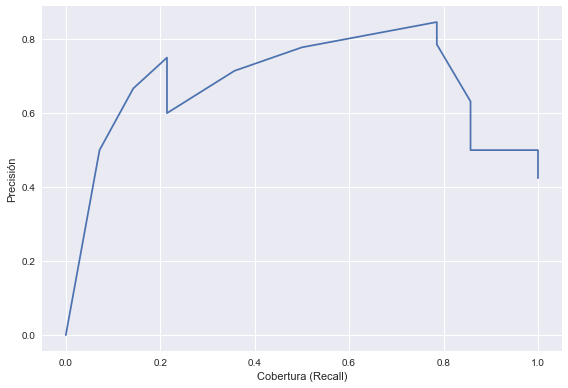

In [78]:
plt.figure()
plt.style.use('seaborn')
plt.plot(recall_probas, precision_probas)
plt.xlabel('Cobertura (Recall)')
plt.ylabel('Precisión')
plt.tight_layout()
plt.savefig('results/recall_presition.png')

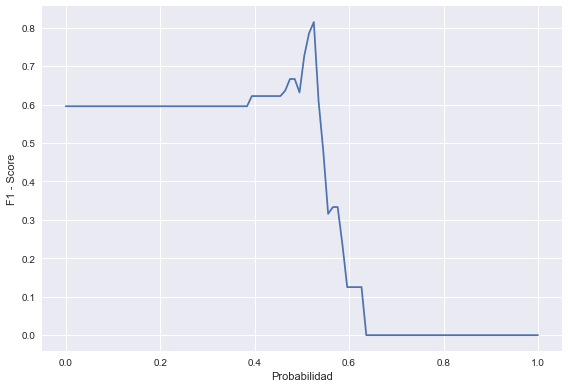

In [79]:
plt.figure()
plt.style.use('seaborn')
plt.plot(probas_cut_alto, f1_probas)
plt.xlabel('Probabilidad')
plt.ylabel('F1 - Score')
plt.tight_layout()
plt.savefig('results/probability_f1score.png')